In [1]:
import pandas_datareader as pdr
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import math

In [19]:
df = pd.read_csv("./data/KOSPI_close.csv", index_col='Date')

In [24]:
df.index = pd.to_datetime(df.index)

In [27]:
df = df.resample('M').last()

In [65]:
df = df['2019-01-01':]

In [66]:
log_df = np.log(df) - np.log(df.shift())

In [98]:
log_df = log_df[log_df.columns[~log_df.loc["2020-06-01":'2021-01-01'].isnull().any()]]

In [99]:
cov = log_df.cov().to_numpy()
mu = log_df.mean().to_numpy()

In [129]:
mu = np.array([0.1, 0.2, 0.15, 0.25, 0.3])
cov = np.array([[0.005, -0.010, 0.004, 0.001, 0.002],
                [-0.010, 0.040, -0.002, 0.002, -0.001],
                [0.004, -0.002, 0.015, 0.003, 0.001],
                [0.001, 0.002, 0.003, 0.050, -0.003],
                [0.002, -0.001, 0.001, -0.003, 0.060]])

In [130]:
cov_inv = np.linalg.pinv(cov)

In [131]:
alpha = mu.dot(cov_inv).dot(mu)
beta = np.sum(cov_inv.dot(mu))
gamma = np.sum(cov_inv)
D = alpha*gamma - beta**2

In [132]:
alpha

11.461029837902396

In [133]:
beta

84.58878488259785

In [134]:
gamma

700.5662001018605

In [135]:
def std(v):
    return math.sqrt((gamma*v**2 - 2*beta*v + alpha) / D)

In [136]:
_x = math.sqrt(1/gamma)
_y = beta/gamma

In [139]:
_x

0.03778117060186337

In [141]:
_y

0.12074345703560756

In [142]:
y_l = np.linspace(_y, 0.5, 100).tolist()
#y_l = np.linspace(-0.2, 0.2, 100).tolist()
x_l = [std(x) for x in y_l]

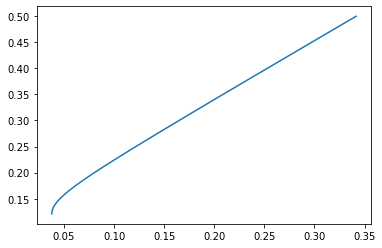

In [143]:
plt.plot(x_l, y_l)

In [116]:
def load_risk_free_rate():
    df = pd.read_csv("./data/TBILL.csv", index_col="DATE")
    return np.log(df*0.01+1).mean().values[0]

In [117]:
rf_rate = load_risk_free_rate()

In [118]:
rf_rate

0.012379591733893199

In [125]:
def CML(risk):
    return rf_rate + math.sqrt(E)*risk

In [145]:
E = alpha - 2*beta *rf_rate + gamma*rf_rate**2

In [146]:
line_x = np.linspace(0, 0.3, 100).tolist()
line_y = [CML(x) for x in line_x]

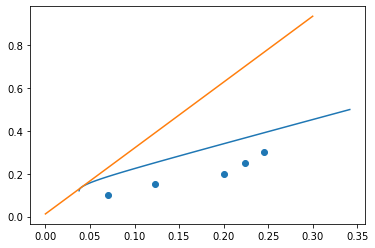

In [147]:
plt.plot(x_l, y_l)
plt.plot(line_x, line_y)
plt.scatter([math.sqrt(cov[x][x]) for x in range(mu.shape[0])], mu)